In [1]:
import matplotlib.pyplot as plt
import pickle
import matplotlib.font_manager as fm

In [2]:
with open('output/model/census13_0311/original_lstm-1w0311-lstm_64_2048_lossMSELoss_ep200_bs8_10k-123-log.pkl', 'rb') as f:
    data = pickle.load(f)

for _ in data.keys():
    print(len(data[_]))

200
200
21


In [3]:
train_avgloss_epoch_list = data["train_avgloss_epoch_list"][:150]
valid_avgloss_epoch_list = data["valid_avgloss_epoch_list"][:150]
valid_qerror_epoch_list = data["valid_qerror_epoch_list"][:16]

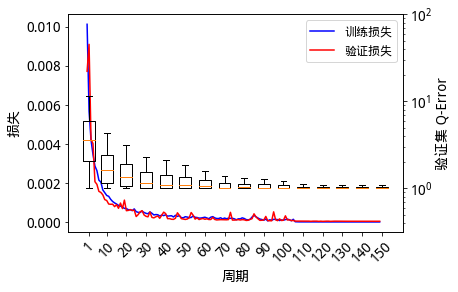

In [4]:
plt.rcParams['font.family'] = ['WenQuanYi Micro Hei']
fig, ax1 = plt.subplots()
ax1.plot(train_avgloss_epoch_list, label='训练损失', color='blue')
ax1.plot(valid_avgloss_epoch_list, label='验证损失', color='red')
ax1.set_xlabel('周期', fontsize=14)  # 设置 x 轴标签的字体大小为 14
ax1.set_ylabel('损失', color='black', fontsize=14)  # 设置 y 轴标签的字体大小为 14
ax1.tick_params(axis='both', which='major', labelsize=14)  # 设置刻度的字体大小为 14
ax1.legend(loc='upper right', fontsize=12) # 设置图例字体大小为 12
ax1.tick_params(axis='x', rotation=45)  # 旋转 x 轴刻度
ax2 = ax1.twinx() # 在同一个图表上创建一个新的y轴，与原始的y轴（ax1）共享x轴。
ax2.boxplot(valid_qerror_epoch_list, positions=[1]+[i * 10 for i in range(1, len(valid_qerror_epoch_list))], sym='+', vert=True, widths=6, showfliers=False)
ax2.set_ylabel('验证集 Q-Error', color='black', fontsize=14)  # 设置 y 轴标签的字体大小为 14
ax2.tick_params(axis='y', labelcolor='black', labelsize=14)  # 设置刻度的字体大小为 14
ax2.set_ylim(10**-0.5, 10**2)  # 设置右轴的纵轴范围
ax2.set_yscale('log')

# plt.title('模型训练损失、验证损失和验证集Q-Error', fontsize=18)  # 设置标题的字体大小为 18
plt.show()


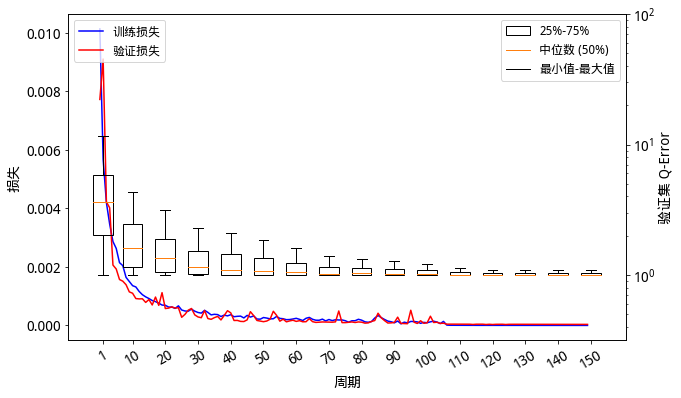

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 设定中文字体
plt.rcParams['font.family'] = ['WenQuanYi Micro Hei']

fig, ax1 = plt.subplots()

# 绘制训练损失和验证损失曲线
ax1.plot(train_avgloss_epoch_list, label='训练损失', color='blue')
ax1.plot(valid_avgloss_epoch_list, label='验证损失', color='red')

ax1.set_xlabel('周期', fontsize=14)
ax1.set_ylabel('损失', color='black', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax1.tick_params(axis='x', rotation=0)

# 创建新的y轴，与原始的y轴共享x轴
ax2 = ax1.twinx()

# 绘制箱型图
boxplot = ax2.boxplot(valid_qerror_epoch_list, positions=[1]+[i * 10 for i in range(1, len(valid_qerror_epoch_list))], 
                      sym='+', vert=True, widths=6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='none'))

ax2.set_ylabel('验证集 Q-Error', color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black', labelsize=14)
ax2.set_ylim(10**-0.5, 10**2)
ax2.set_yscale('log')

# 创建自定义图例
# ax2.legend(handles=[boxplot['boxes'][0], boxplot['medians'][0], boxplot['whiskers'][0], boxplot['whiskers'][2]],
#            labels=['25%-75%', '中位数 (50%)', '最小值-最大值', '最小值'], loc='upper right', fontsize=12)
ax2.legend(handles=[boxplot['boxes'][0], boxplot['medians'][0], boxplot['whiskers'][0]],
           labels=['25%-75%', '中位数 (50%)', '最小值-最大值'], loc='upper right', fontsize=12)
fig.set_size_inches(10, 6)  # 设置宽度为10英寸，高度为6英寸
# plt.show()
plt.savefig('./output/result/census0311/train.png', dpi=500)

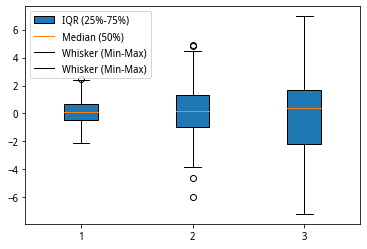

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 生成随机数据
np.random.seed(10)
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# 绘制箱型图
boxplot = plt.boxplot(data, patch_artist=True)

# 创建自定义图例
plt.legend(handles=[boxplot['boxes'][0], boxplot['medians'][0], boxplot['whiskers'][0], boxplot['whiskers'][2]],
           labels=['IQR (25%-75%)', 'Median (50%)', 'Whisker (Min-Max)', 'Whisker (Min-Max)'])

# 显示图形
plt.show()
